In [46]:
#librairy 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import numpy as np 
from statsmodels.stats.weightstats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [141]:
df = pd.read_csv('../data/hospitalisations.csv')

#df = df.set_index("Date d'admission")
#df_2 = df["Date d'admission"] = "2020-03-20"
df["Date d'admission"] = pd.to_datetime(df["Date d'admission"])

df['total'] = df["Hors soins intensifs"] + df['Aux soins intensifs']
df


,Date d'admission,Hors soins intensifs,Aux soins intensifs,total
0,2020-02-24,3,1,4
1,2020-02-25,1,1,2
2,2020-02-26,2,1,3
3,2020-02-27,1,0,1
4,2020-02-28,1,1,2
...,...,...,...,...
320,2021-01-09,97,20,117
321,2021-01-10,86,17,103
322,2021-01-11,115,20,135
323,2021-01-12,112,13,125


In [85]:
import plotly.express as px 
import plotly.graph_objs as go
import plotly.graph_objs as go 


fig = px.line(df, x = "Date d'admission", y= df.columns,
              hover_data={"Date d'admission" : "|%Y %m, %d"},
              title='Hospitalization cases since March 2020')

fig.add_vline(x='2020-03-20', line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x='2020-08-31', line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x='2020-12-25', line_width=3, line_dash="dash", line_color="green")

fig.update_xaxes(
    dtick='M1',
    tickformat="%b\n%Y"
)
fig.show()

In [140]:
start_date = '2020-12-06'
end_date = '2021-01-13'

#mask for The 25/12/2020 lockdown
lockdown_2 = (df["Date d'admission"]  > start_date) & (df["Date d'admission"]  < end_date)

df_lockdown_2 = df.loc[lockdown_2]
#centralize the running variable date d'admission at 2020-12-25
#df_lockdown_2["Date d'admission"] = "2020-12-25"

df_lockdown_2.reset_index(drop=True, inplace=True)
df_lockdown_2

,Date d'admission,Hors soins intensifs,Aux soins intensifs,total
0,2020-12-07,68,13,81
1,2020-12-08,86,13,99
2,2020-12-09,86,12,98
3,2020-12-10,79,15,94
4,2020-12-11,89,10,99
5,2020-12-12,83,12,95
6,2020-12-13,91,8,99
7,2020-12-14,93,18,111
8,2020-12-15,105,14,119
9,2020-12-16,92,10,102


In [87]:
fig = px.line(df_lockdown_2, x = "Date d'admission", y= df_lockdown_2.columns,
              hover_data={"Date d'admission" : "|%Y %m, %d"},
              title='Hospitalization cases since March 2020')

#fig.add_vline(x='2020-03-20', line_width=3, line_dash="dash", line_color="green")
#fig.add_vline(x='2020-08-31', line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x='2020-12-25', line_width=3, line_dash="dash", line_color="green")

fig.update_xaxes(
    #dtick='M1',
    #tickformat="%b\n%Y"
)
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


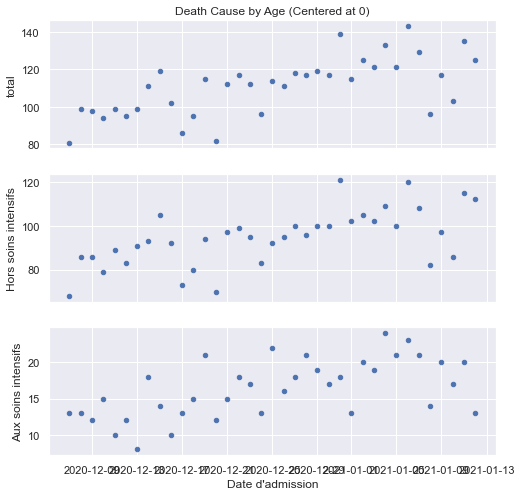

In [143]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
df_lockdown_2.plot.scatter(x="Date d'admission", y="total", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")
#xvline = '2020-12-25'
ax = plt.subplot(3,1,2, sharex=ax)
df_lockdown_2.plot.scatter(x="Date d'admission", y="Hors soins intensifs", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
df_lockdown_2.plot.scatter(x="Date d'admission", y="Aux soins intensifs", ax=ax);

In [136]:
import pandas as pd
import statsmodels.formula.api as smf 
import statsmodels.api as sm  
import seaborn as sns
import matplotlib.pyplot as plt 

df_lockdown_2.head(5)


,Date d'admission,Hors soins intensifs,Aux soins intensifs,total,Group
0,2020-12-07,68,13,81,Control
1,2020-12-08,86,13,99,Control
2,2020-12-09,86,12,98,Control
3,2020-12-10,79,15,94,Control
4,2020-12-11,89,10,99,Control


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     14.94
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.59e-06
Time:                        20:13:01   Log-Likelihood:                -140.75
No. Observations:                  37   AIC:                             289.5
Df Residuals:                      33   BIC:                             295.9
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.9123      3.920     23.959      

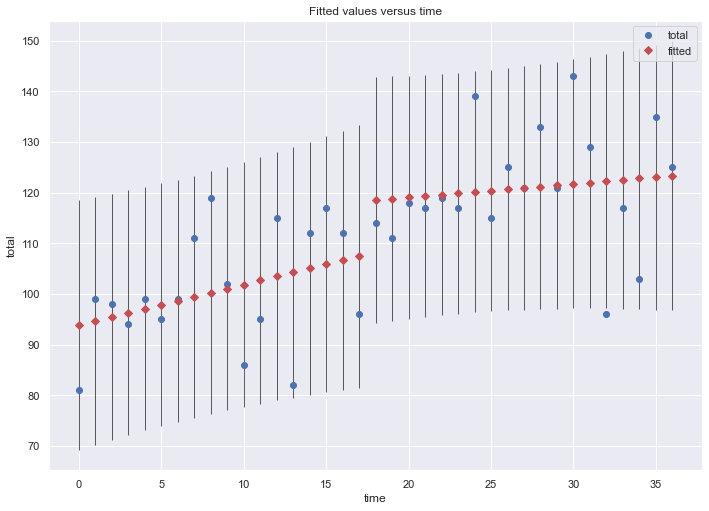

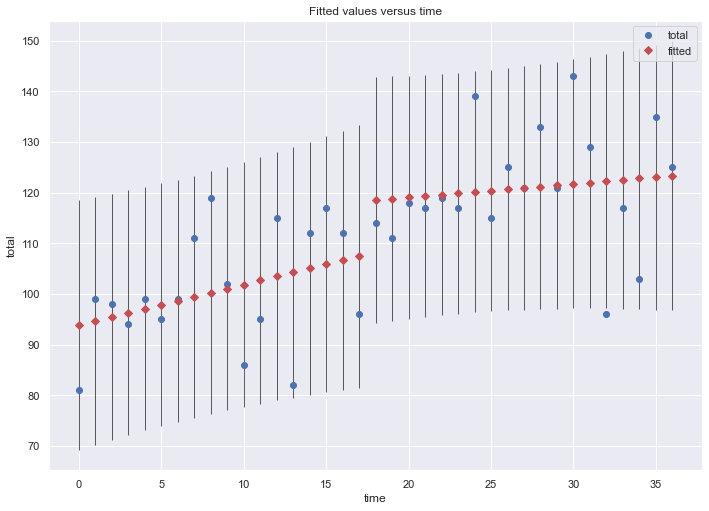

In [172]:

#mask for The 25/12/2020 lockdown
#lockdown_2 = (df["Date d'admission"]  > start_date) & (df["Date d'admission"]  < end_date)

#df_lockdown_2 =df_lockdown_2.drop(columns='age_bin')
df_lockdown_2['Group'] = np.where(df_lockdown_2["Date d'admission"] >= '2020-12-25', "After", "Before") #use iloc instead 
df_lockdown_2

#x = df_lockdown_2.index

y = df_lockdown_2.total

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)
x['cutoffslope'] = x['cutoff'] * x.time
#x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
#x['time2'] = x.time ** 2

re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())

sm.graphics.plot_fit(re, 'time') #time is equal to x axis

#the jump at the cutoff is = 10.8772 

In [163]:
x

,const,time,cutoff,cutoffslope
0,1.0,0.0,0,0.0
1,1.0,1.0,0,0.0
2,1.0,2.0,0,0.0
3,1.0,3.0,0,0.0
4,1.0,4.0,0,0.0
5,1.0,5.0,0,0.0
6,1.0,6.0,0,0.0
7,1.0,7.0,0,0.0
8,1.0,8.0,0,0.0
9,1.0,9.0,0,0.0


In [152]:
(df_lockdown_2["Group"] == 'After').astype(int)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
Name: Group, dtype: int32